#librosa 

## 샘플링
음성을 처리하기 위해 아날로그 정보를 잘게 쪼개 이산적인 디지털 정보로 표현해야 함.

이때 무한히 쪼개서 저장할 수는 없으므로, 기준을 세워 아날로그 정보를 쪼개 대표값을 사용, 이를 샘플링이라고 한다.

주로 사용할 때 시간을 기준으로 아날로그 정보를 쪼개는 time domain 방식을 사용한다.

### sampling rate
sampling rate는 아날로그 정보를 얼마나 잘게 쪼갤지를 결정

잘게 쪼갤수록 정보 손실이 줄어들지만, 데이터의 크기가 늘어남.

이게 저번에 음성정보에 대해 공부할때 배운 windowing을 말하는 것 같다. windowing 역시 audio signal이 windowing을 통해 구간 별로 쪼개지므로, 신호를 구간 갑승로 나누어 준 것이기 때문이다.

### sampling theorem
sampling rate가 최대 frequency보다 2배 커져야 함을 의미

일반적으로 sampling은 인간의 청각 영역에 맞게 형성

이게 음성복원을 말하는 것 같다. 얼핏 공부하면서, 원래로 돌오기 위해서 2배가 더 커져야 한다고 하던데 이걸 말하는 것 같다.

음성의 길이는 데이터의 길이와 sampling rate를 나누어서 확인이 가능하다.



IsolationForst

https://runebook.dev/ko/docs/scikit_learn/modules/generated/sklearn.ensemble.isolationforest


디지털로 변환된 데이터는 아날로그에 비해 한계가 있습니다. 컴퓨터는 특정 주기로 연산을 하기 때문에, 오리지날 신호 그 자체를 저장할 수 없기 때문인데요. 아래 그림을 보시면 이해가 될 것입니다. 부드러운 실제 우리가 듣는 아날로그 신호를 저장할 때, 컴퓨터는 특정 주기로 점을 찍는 방식으로 데이터를 저장하게 됩니다. 즉, 점 찍는 주기가 얼마나 빠르냐에 따라 아날로그 신호를 더 잘 저장할 수 있게 되는 것입니다. 이를 sampling rate이라고 하며, descrete signal processing에 자주 나오는 용어입니다. 

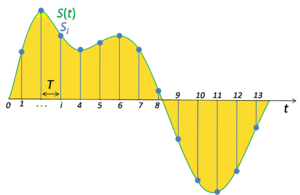

In [ ]:
import random
import pandas as pd
import numpy as np
import os
import librosa
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

from tqdm.auto import tqdm
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore') 

In [ ]:
CFG = {
    'SR':16000,
    'N_MFCC':128, # MFCC 벡터를 추출할 개수 (<=128)
    'SEED':41
}

In [ ]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)

seed_everything(CFG['SEED']) # Seed 고정

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!unzip -qq "/content/drive/MyDrive/open (3).zip"

In [ ]:
train_df = pd.read_csv('/content/train.csv') # 모두 정상 Sample
test_df = pd.read_csv('/content/test.csv')

In [ ]:
train_df

,SAMPLE_ID,SAMPLE_PATH,FAN_TYPE,LABEL
0,TRAIN_0000,./train/TRAIN_0000.wav,2,0
1,TRAIN_0001,./train/TRAIN_0001.wav,0,0
2,TRAIN_0002,./train/TRAIN_0002.wav,0,0
3,TRAIN_0003,./train/TRAIN_0003.wav,2,0
4,TRAIN_0004,./train/TRAIN_0004.wav,2,0
...,...,...,...,...
1274,TRAIN_1274,./train/TRAIN_1274.wav,2,0
1275,TRAIN_1275,./train/TRAIN_1275.wav,2,0
1276,TRAIN_1276,./train/TRAIN_1276.wav,2,0
1277,TRAIN_1277,./train/TRAIN_1277.wav,2,0


In [ ]:
test_df

,SAMPLE_ID,SAMPLE_PATH,FAN_TYPE
0,TEST_0000,./test/TEST_0000.wav,2
1,TEST_0001,./test/TEST_0001.wav,2
2,TEST_0002,./test/TEST_0002.wav,0
3,TEST_0003,./test/TEST_0003.wav,0
4,TEST_0004,./test/TEST_0004.wav,0
...,...,...,...
1509,TEST_1509,./test/TEST_1509.wav,0
1510,TEST_1510,./test/TEST_1510.wav,2
1511,TEST_1511,./test/TEST_1511.wav,0
1512,TEST_1512,./test/TEST_1512.wav,0


In [ ]:
def check_sr(df):

  list_sr = []

  for path in tqdm(train_df['SAMPLE_PATH']):

    # sampling rate (sr) : 초당 샘플 갯수
    sampling_rate = librosa.get_samplerate(path)
    list_sr.append(sampling_rate)
  
  return list_sr

In [ ]:
list_train_sr = check_sr(train_df)
list_test_sr = check_sr(test_df)

  0%|          | 0/1279 [00:00<?, ?it/s]

  0%|          | 0/1279 [00:00<?, ?it/s]

 sampling rate으로, 초당 샘플 갯수를 의미

 1초동안 재생되는 샘플의 갯수

In [ ]:
list_test_sr

[16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,


In [ ]:
list_train_sr

[16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,


Text(0.5, 1.0, 'Test Data SR')

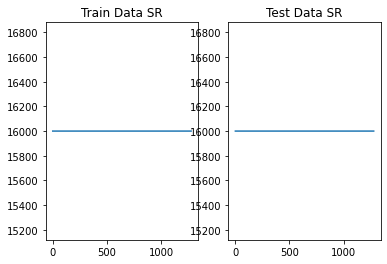

In [ ]:
plt.subplot(1, 2, 1)
plt.plot(list_train_sr)
plt.title('Train Data SR')

plt.subplot(1, 2, 2)
fig2 = plt.plot(list_test_sr)
plt.title('Test Data SR')

모두 1600개의 sample rate를 가진다.


# check_waveform 설명
```
코드 설명

def check_waveform(df, sample_num):

  cond_fan_0 = (df['FAN_TYPE'] == 0)

  fan_0 = df.loc[cond_fan_0]

  fan_2 = df.loc[~cond_fan_0]

  print('\nFan Type : 0\n')

  list_sample_path = list(fan_0.sample(sample_num, random_state=41)['SAMPLE_PATH'])

  for path in list_sample_path:

    wav, sr = librosa.load(path, sr=16000)

    fig = plt.figure(figsize = (14,5))
    librosa.display.waveplot(wav, sr=sr)
    plt.title(path.split('/')[-1])
    plt.ylabel("Amplitude")
    plt.show()

  print('\nFan Type : 2\n')

  list_sample_path = list(fan_2.sample(sample_num, random_state=41)['SAMPLE_PATH'])

  for path in list_sample_path:

    wav, sr = librosa.load(path, sr=16000)

    fig = plt.figure(figsize = (14,5))
    librosa.display.waveplot(wav, sr=sr)
    plt.title(path.split('/')[-1])
    plt.ylabel("Amplitude")
    plt.show()
```



In [ ]:
def check_waveform(df, sample_num):

  cond_fan_0 = (df['FAN_TYPE'] == 0)

  fan_0 = df.loc[cond_fan_0]

  fan_2 = df.loc[~cond_fan_0]

  print('\nFan Type : 0\n')
  print(cond_fan_0)
  print(fan_0)
  print(fan_2)


 cond_fan_0 = 값이 0인것만 따로 뽑기

 fan_0은 0인값만 

 fan_2는 2인값만

 

In [ ]:
check_waveform(train_df, 2)


Fan Type : 0

0       False
1        True
2        True
3       False
4       False
        ...  
1274    False
1275    False
1276    False
1277    False
1278     True
Name: FAN_TYPE, Length: 1279, dtype: bool
       SAMPLE_ID             SAMPLE_PATH  FAN_TYPE  LABEL
1     TRAIN_0001  ./train/TRAIN_0001.wav         0      0
2     TRAIN_0002  ./train/TRAIN_0002.wav         0      0
8     TRAIN_0008  ./train/TRAIN_0008.wav         0      0
9     TRAIN_0009  ./train/TRAIN_0009.wav         0      0
13    TRAIN_0013  ./train/TRAIN_0013.wav         0      0
...          ...                     ...       ...    ...
1267  TRAIN_1267  ./train/TRAIN_1267.wav         0      0
1269  TRAIN_1269  ./train/TRAIN_1269.wav         0      0
1271  TRAIN_1271  ./train/TRAIN_1271.wav         0      0
1273  TRAIN_1273  ./train/TRAIN_1273.wav         0      0
1278  TRAIN_1278  ./train/TRAIN_1278.wav         0      0

[639 rows x 4 columns]
       SAMPLE_ID             SAMPLE_PATH  FAN_TYPE  LABEL
0     TRAIN

In [ ]:
train_df

,SAMPLE_ID,SAMPLE_PATH,FAN_TYPE,LABEL
0,TRAIN_0000,./train/TRAIN_0000.wav,2,0
1,TRAIN_0001,./train/TRAIN_0001.wav,0,0
2,TRAIN_0002,./train/TRAIN_0002.wav,0,0
3,TRAIN_0003,./train/TRAIN_0003.wav,2,0
4,TRAIN_0004,./train/TRAIN_0004.wav,2,0
...,...,...,...,...
1274,TRAIN_1274,./train/TRAIN_1274.wav,2,0
1275,TRAIN_1275,./train/TRAIN_1275.wav,2,0
1276,TRAIN_1276,./train/TRAIN_1276.wav,2,0
1277,TRAIN_1277,./train/TRAIN_1277.wav,2,0


In [ ]:
def check_waveform(df, sample_num):

  cond_fan_0 = (df['FAN_TYPE'] == 0)

  fan_0 = df.loc[cond_fan_0]

  fan_2 = df.loc[~cond_fan_0]

  print('\nFan Type : 0\n')

  list_sample_path = list(fan_0.sample(sample_num, random_state=41)['SAMPLE_PATH'])

  for path in list_sample_path:

    wav, sr = librosa.load(path, sr=16000)

    fig = plt.figure(figsize = (14,5))
    librosa.display.waveplot(wav, sr=sr)
    plt.title(path.split('/')[-1])
    plt.ylabel("Amplitude")
    plt.show()

  print('\nFan Type : 2\n')

  list_sample_path = list(fan_2.sample(sample_num, random_state=41)['SAMPLE_PATH'])

  for path in list_sample_path:

    wav, sr = librosa.load(path, sr=16000)

    fig = plt.figure(figsize = (14,5))
    librosa.display.waveplot(wav, sr=sr)
    plt.title(path.split('/')[-1])
    plt.ylabel("Amplitude")
    plt.show()



```
list_sample_path = list(fan_0.sample(sample_num, random_state=41)['SAMPLE_PATH'])
```

이건 pandas 라이브러리의 sample 함수를 사용한 것

--> sample함수란? 
랜덤한 샘플을 추출하는 것

df.sample(갯수,random_state는 시드값을 박아두는 것)[칼럼]

Amplitude = 진폭

In [ ]:
import librosa.display


Fan Type : 0



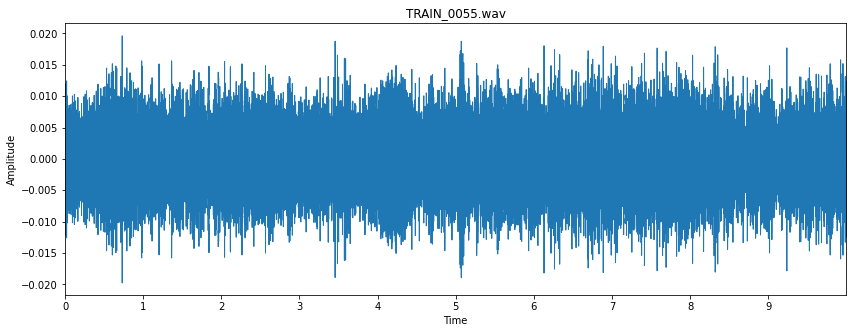

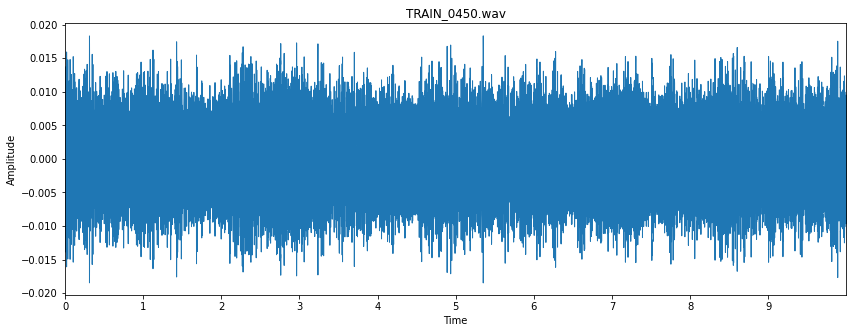


Fan Type : 2



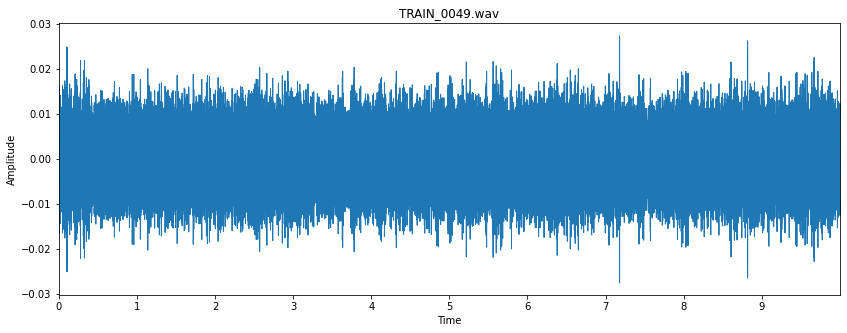

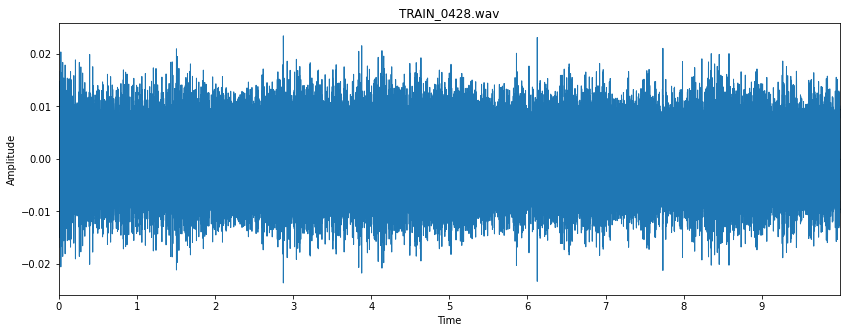

In [ ]:
check_waveform(train_df, 2)


Fan Type : 0



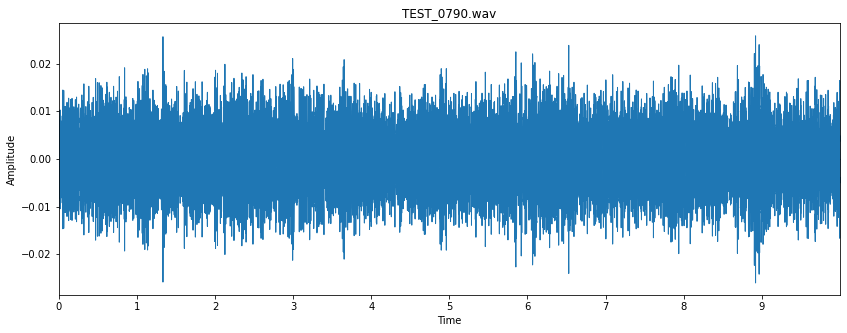

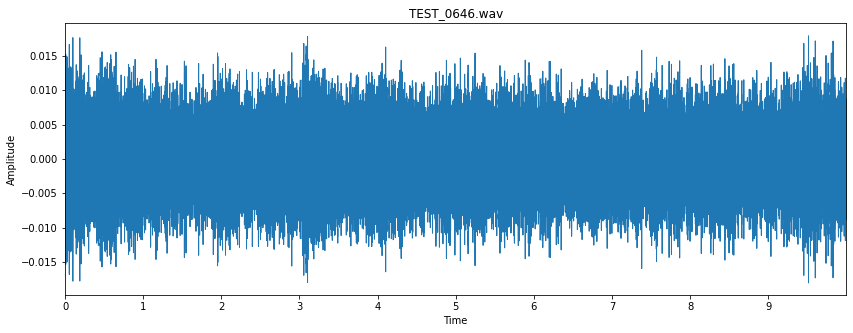


Fan Type : 2



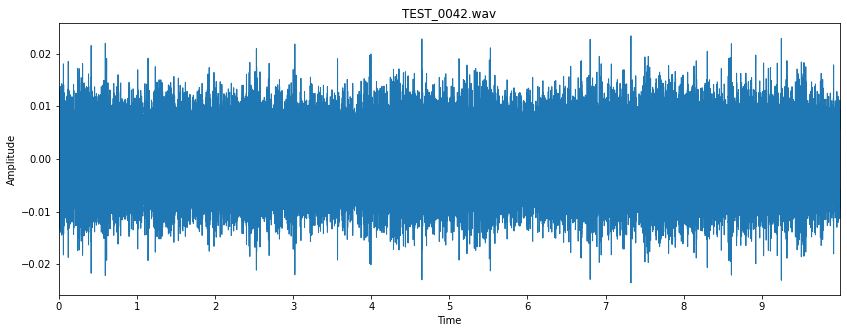

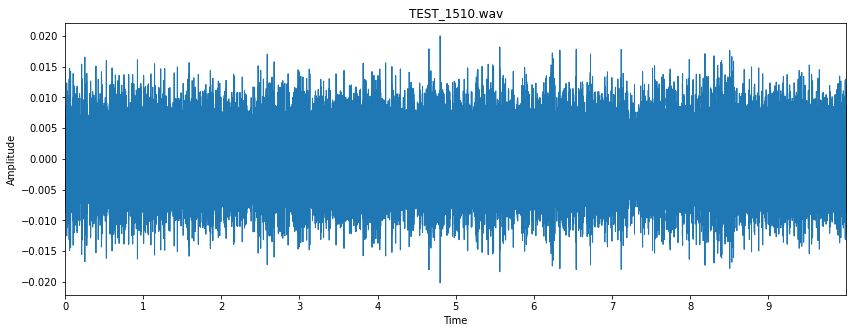

In [ ]:
check_waveform(test_df, 2)

#fft 고속 푸리에 변환
푸리에 변환(Fourier transform, FT)은 시간이나 공간에 대한 함수를 시간 또는 공간 주파수 성분으로 분해하는 변환

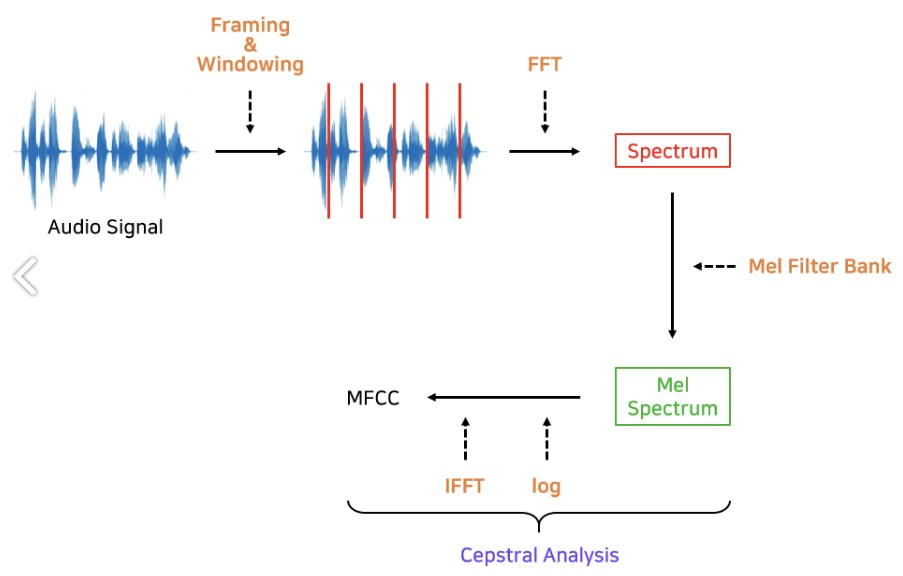

위 그림을 참고하면 windowing이 종료되고, spectrum을 만들기 위해서 fft를 반드시 거쳐야 한다.

데이터의 Domain을 Time(시간)에서 Frequency(주파수)로 변환하는 걸로 이해하면 된다.

그럼 FFT가 필요한 이유는 무엇일까? 바로 대상체의 소음, 진동을 측정 후 이것에 대한 분석을 하기 위함이다.

이제 FFT를 사용해서 상기의 그래프처럼 각 Hz별 주파수 성분을 알 수 있다. 이와 같이 FFT를 할 경우 Time에서 확인이 어려웠던 특정 소리 값들을 50, 80, 200 포인트의 주파수를 통해 간단히 한번에 파악할 수 있다. 

다시 말하면, 피아노 건반에서 도와 미를 동시에 쳐서 녹음할 경우, 이러한 신호를 FFT하게 되면 도와 미에 해당하는 각각의 주파수 성분을 바로 확인할 수 있는 것과 같은 이치다.

마지막으로 정리하자면, fft는 해당신호가 주파수 영역으로 보았을때, 어떤 주파수의 성분을 얼만큼 가지고 있는지 매우 가시적으로 표현이 가능하다. 하지만 시간의 흐름에 따라 신호의 주파수가 변할때, 어떤 시간대에서 주파수의 변화가 일어났는지 알 수 없다.



```
def check_FFT(df, sample_num):

  cond_fan_0 = (df['FAN_TYPE'] == 0)

  fan_0 = df.loc[cond_fan_0]

  fan_2 = df.loc[~cond_fan_0]

  print('\nFan Type : 0\n')

  list_sample_path = list(fan_0.sample(sample_num, random_state=41)['SAMPLE_PATH'])

  for path in list_sample_path:

    wav, sr = librosa.load(path, sr=16000)

    fft = np.fft.fft(wav)
    magnitude = np.abs(fft)
    frequency = np.linspace(0, sr, len(magnitude))

    left_frequency = frequency[:int(len(frequency)/2)]
    left_magnitude = magnitude[:int(len(magnitude)/2)]

    fig = plt.figure(figsize = (14,5))
    plt.plot(left_frequency, left_magnitude)
    plt.title(path.split('/')[-1])
    plt.xlabel("Frequency")
    plt.ylabel("Magnitude")
    plt.show()

  print('\nFan Type : 2\n')

  list_sample_path = list(fan_2.sample(sample_num, random_state=41)['SAMPLE_PATH'])

  for path in list_sample_path:

    wav, sr = librosa.load(path, sr=16000)

    fft = np.fft.fft(wav)
    magnitude = np.abs(fft)
    frequency = np.linspace(0, sr, len(magnitude))

    left_frequency = frequency[:int(len(frequency)/2)]
    left_magnitude = magnitude[:int(len(magnitude)/2)]

    fig = plt.figure(figsize = (14,5))
    plt.plot(left_frequency, left_magnitude)
    plt.title(path.split('/')[-1])
    plt.xlabel("Frequency")
    plt.ylabel("Magnitude")
    plt.show()
```



In [ ]:
def check_FFT(df, sample_num):

  cond_fan_0 = (df['FAN_TYPE'] == 0)

  fan_0 = df.loc[cond_fan_0]

  fan_2 = df.loc[~cond_fan_0]

  print('\nFan Type : 0\n')

  list_sample_path = list(fan_0.sample(sample_num, random_state=41)['SAMPLE_PATH'])

앞부분과 동일하게 임의의 smaple을 추출한다.


```
np.fft.fft
```

이게 푸리에 변환을 시키는 함수

```
np.abs
```
이건 절댓값을 구하는 함수

```
np.linespace(구간 시각점, 구간 끝점, 구간 내 숫자 갯수)
```

In [ ]:
def check_FFT(df, sample_num):

  cond_fan_0 = (df['FAN_TYPE'] == 0)

  fan_0 = df.loc[cond_fan_0]

  fan_2 = df.loc[~cond_fan_0]

  print('\nFan Type : 0\n')

  list_sample_path = list(fan_0.sample(sample_num, random_state=41)['SAMPLE_PATH'])

  for path in list_sample_path:

    wav, sr = librosa.load(path, sr=16000)

    fft = np.fft.fft(wav)
    magnitude = np.abs(fft)
    frequency = np.linspace(0, sr, len(magnitude))

    left_frequency = frequency[:int(len(frequency)/2)]
    left_magnitude = magnitude[:int(len(magnitude)/2)]

    fig = plt.figure(figsize = (14,5))
    plt.plot(left_frequency, left_magnitude)
    plt.title(path.split('/')[-1])
    plt.xlabel("Frequency")
    plt.ylabel("Magnitude")
    plt.show()

  print('\nFan Type : 2\n')

  list_sample_path = list(fan_2.sample(sample_num, random_state=41)['SAMPLE_PATH'])

  for path in list_sample_path:

    wav, sr = librosa.load(path, sr=16000)

    fft = np.fft.fft(wav)
    magnitude = np.abs(fft)
    frequency = np.linspace(0, sr, len(magnitude))

    left_frequency = frequency[:int(len(frequency)/2)]
    left_magnitude = magnitude[:int(len(magnitude)/2)]

    fig = plt.figure(figsize = (14,5))
    plt.plot(left_frequency, left_magnitude)
    plt.title(path.split('/')[-1])
    plt.xlabel("Frequency")
    plt.ylabel("Magnitude")
    plt.show()

Magnitude---소리의 크기


Fan Type : 0



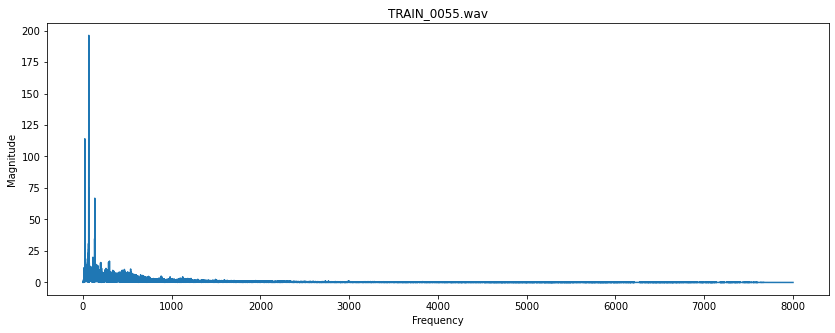

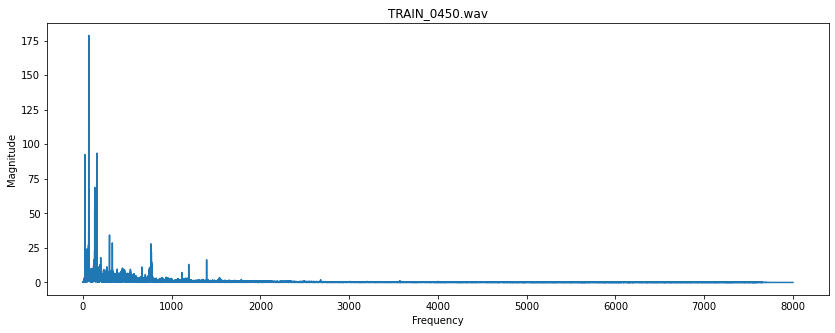


Fan Type : 2



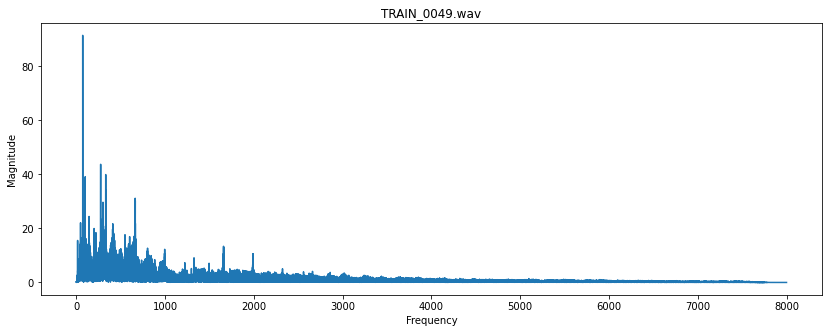

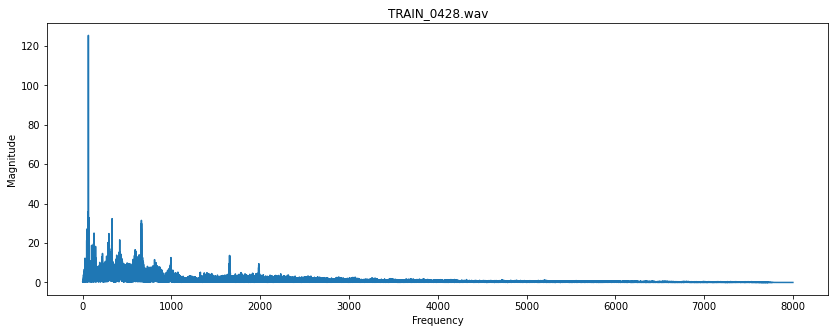

In [ ]:
check_FFT(train_df, 2)

즉 푸리에 변환이란 푸리에 변환(Fourier transform, FT)은 시간이나 공간에 대한 함수를 시간 또는 공간 주파수 성분으로 분해하는 변환이므로 이전에 시간으로 이루어진 걸 주파수로 변경


Fan Type : 0



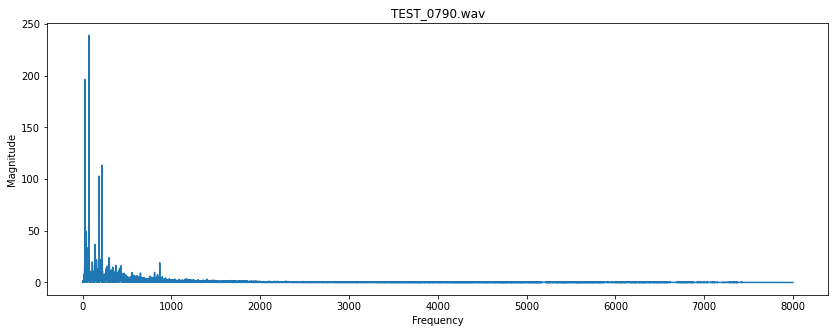

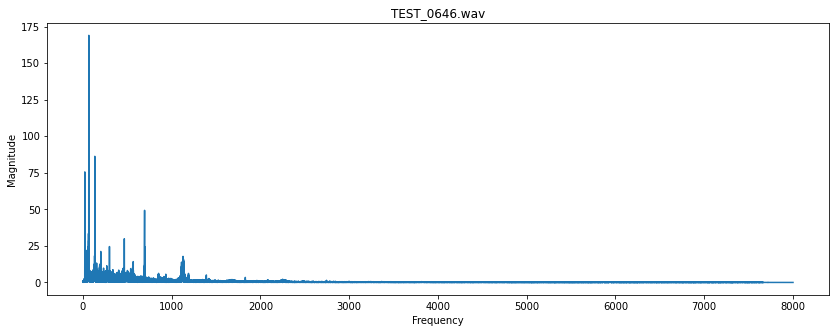


Fan Type : 2



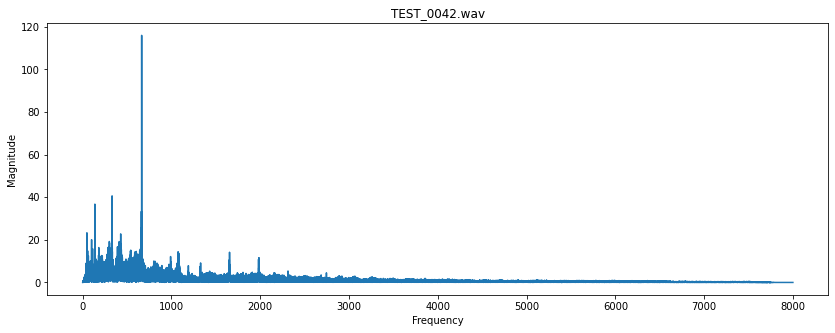

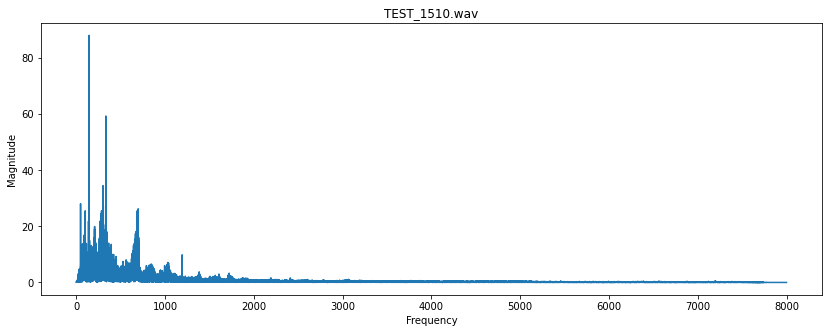

In [ ]:
check_FFT(test_df, 2)

#STFT (Short-Time Fourier Transform)

시간에 따라 주파수가 변하는 신호

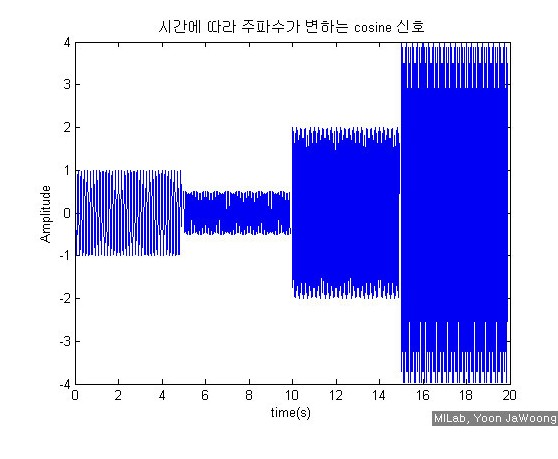

이것이 stft, 국소 푸리에 변환이다. 이 주파수는 5초에 한번씩 주파수가 변한다는 것을 알 수 있다.

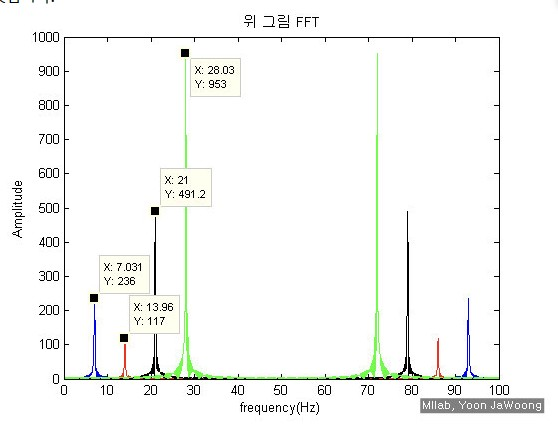

이것은 fft, 일반 푸리에 변환이다. 각 주파수 별로 피크를 알려준다. 즉, 해당신호가 주파수 영역으로 보았을때, 어떤 주파수의 성분을 얼만큼 가지고 있는지 알려준다.



```
def check_STFT(df, sample_num, n_fft, hop_length): 

  cond_fan_0 = (df['FAN_TYPE'] == 0)

  fan_0 = df.loc[cond_fan_0]

  fan_2 = df.loc[~cond_fan_0]

  print('\nFan Type : 0\n')

  list_sample_path = list(fan_0.sample(sample_num, random_state=41)['SAMPLE_PATH'])

  for path in list_sample_path:

    wav, sr = librosa.load(path, sr=16000)

    stft = librosa.stft(wav, n_fft = n_fft, hop_length = hop_length)
    spectrogram = np.abs(stft)

    fig = plt.figure(figsize = (14,5))
    librosa.display.specshow(spectrogram, sr=sr, hop_length=hop_length)
    plt.title(path.split('/')[-1])
    plt.xlabel("Time")
    plt.ylabel("Frequency")
    plt.plasma()
    plt.show()

  print('\nFan Type : 2\n')

  list_sample_path = list(fan_2.sample(sample_num, random_state=41)['SAMPLE_PATH'])

  for path in list_sample_path:

    wav, sr = librosa.load(path, sr=16000)

    stft = librosa.stft(wav, n_fft = n_fft, hop_length = hop_length)
    spectrogram = np.abs(stft)

    fig = plt.figure(figsize = (14,5))
    librosa.display.specshow(spectrogram, sr=sr, hop_length=hop_length)
    plt.title(path.split('/')[-1])
    plt.xlabel("Time")
    plt.ylabel("Frequency")
    plt.plasma()
    plt.show()
```



In [ ]:
def check_STFT(df, sample_num, n_fft, hop_length): 

  cond_fan_0 = (df['FAN_TYPE'] == 0)

  fan_0 = df.loc[cond_fan_0]

  fan_2 = df.loc[~cond_fan_0]

  print('\nFan Type : 0\n')

  list_sample_path = list(fan_0.sample(sample_num, random_state=41)['SAMPLE_PATH'])

이까지는 위와 동일



```
librosa.stft(wav, n_fft = n_fft, hop_length = hop_length)
```
설명

wav = 음성 파일

n_fft = window(변하는 구간)을 정의

hop_length = 겹치는 사이츠를 정의


그런데 값이 너무 미세해서 차이를 파악하고 관찰하기 적합하지 않습니다.

In [ ]:
def check_STFT(df, sample_num, n_fft, hop_length): 

  cond_fan_0 = (df['FAN_TYPE'] == 0)

  fan_0 = df.loc[cond_fan_0]

  fan_2 = df.loc[~cond_fan_0]

  print('\nFan Type : 0\n')

  list_sample_path = list(fan_0.sample(sample_num, random_state=41)['SAMPLE_PATH'])

  for path in list_sample_path:

    wav, sr = librosa.load(path, sr=16000)

    stft = librosa.stft(wav, n_fft = n_fft, hop_length = hop_length)
    spectrogram = np.abs(stft)

    fig = plt.figure(figsize = (14,5))
    librosa.display.specshow(spectrogram, sr=sr, hop_length=hop_length)
    plt.title(path.split('/')[-1])
    plt.xlabel("Time")
    plt.ylabel("Frequency")
    plt.plasma()
    plt.show()


Fan Type : 0



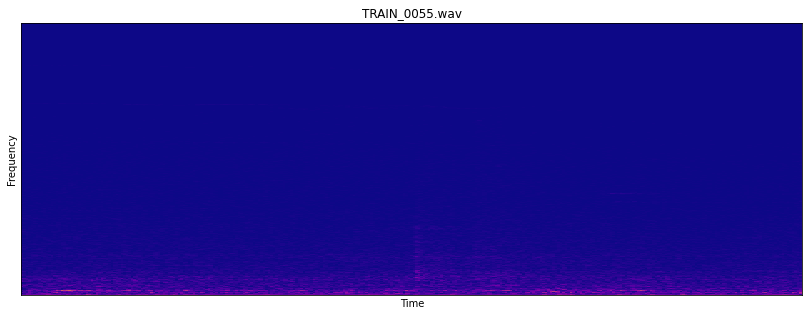

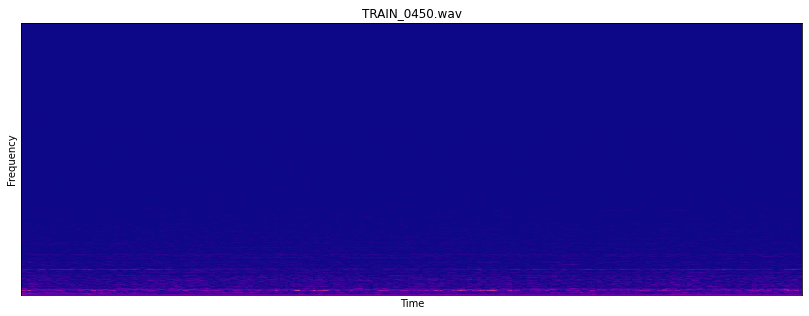

In [ ]:
check_STFT(train_df, 2, 2048, 512)

https://lucaseo.github.io/posts/2021-01-22-hands-on-preprocess-audio-data/